In [1]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_model = ChoiceModel()
old_data = pd.DataFrame(columns=['period','PPI','CVI','DCI','Number'])

In [3]:
for period in range(1,10):
    old_model.roll_back(period)
    PPI,CVI,DCI = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    old_data.loc[len(old_data)] = [period,PPI,CVI,DCI,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [4]:
old_data

,period,PPI,CVI,DCI,Number
0,1.0,0.362038,3.980198,0.047619,173.0
1,2.0,0.344548,4.083333,0.029126,292.0
2,3.0,0.384506,4.483607,0.019108,458.0
3,4.0,0.401504,4.693431,0.015789,527.0
4,5.0,0.405878,4.657895,0.014354,595.0
5,6.0,0.407511,4.580060,0.013158,670.0
6,7.0,0.408266,4.607143,0.012295,770.0
7,8.0,0.399104,4.609572,0.011450,850.0
8,9.0,0.401623,4.614610,0.011450,851.0


In [5]:

new_data = pd.DataFrame(columns=['period','PPI','CVI','DCI','Number'])

In [6]:
for period in range(1,10):
    file = f'new_graph/new_graph_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    new_data.loc[len(new_data)] = [period,PPI,CVI,DCI,num]

In [7]:
new_data

,period,PPI,CVI,DCI,Number
0,1.0,0.224487,3.520000,0.076923,163.0
1,2.0,0.201854,3.913386,0.075000,221.0
2,3.0,0.201688,4.311688,0.068182,295.0
3,4.0,0.747900,4.538462,0.054545,358.0
4,5.0,0.762620,4.681223,0.047619,434.0
5,6.0,0.779977,4.799127,0.045455,434.0
6,7.0,0.779950,4.807860,0.045455,434.0
7,8.0,0.779950,4.807860,0.045455,434.0
8,9.0,0.779950,4.807860,0.045455,434.0


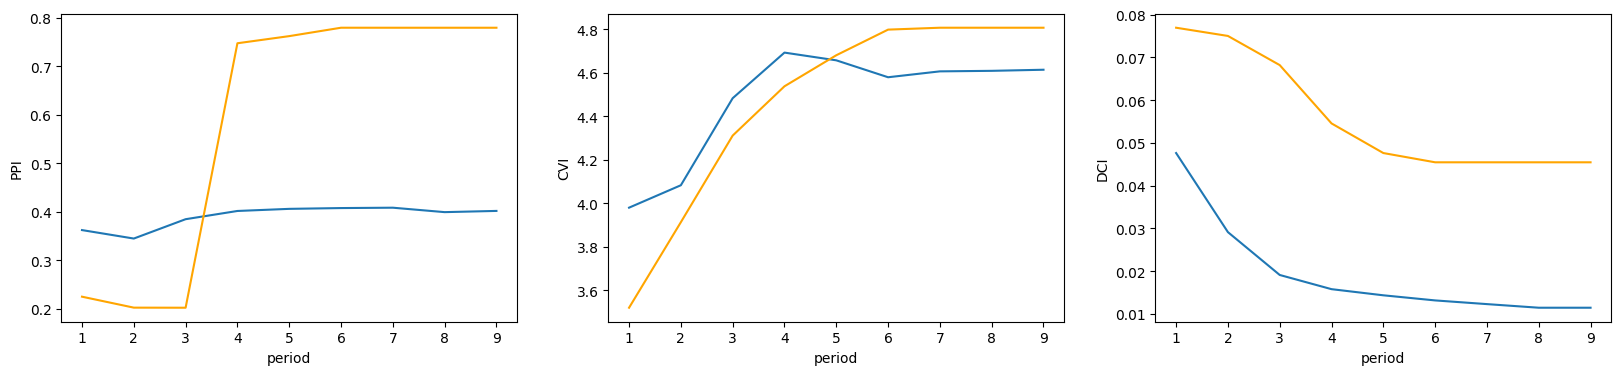

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,4))

sns.lineplot(data=old_data, x='period', y='PPI', ax=ax[0])
sns.lineplot(data=new_data, x='period', y='PPI', ax=ax[0], color='orange')
sns.lineplot(data=old_data, x='period', y='CVI', ax=ax[1])
sns.lineplot(data=new_data, x='period', y='CVI', ax=ax[1], color='orange')
sns.lineplot(data=old_data, x='period', y='DCI', ax=ax[2])
sns.lineplot(data=new_data, x='period', y='DCI', ax=ax[2], color='orange')
plt.show()